# Graphing with Matplotlib but styling like ggplot2

An overview of how to use Python matplotlib for data visualization, using temperature and greenhouse gas data from NASA.

At the end of the guide, you'll see a few ways to achieve a ggplot2-like aesthetic using the matplotlib API:


<br><br>

![img](images/ggplot-global-temp-level.png)


(In progress)




# About the data


This repo contains two data files:

- [data/nasa-ghgases.csv](data/nasa-ghgases.csv) -- NASA CO2 measurements from 1850 to 2011
- [data/nasa-gistemp.csv](data/nasa-gistemp.csv) -- NASA temperature measurements from 1880 to 2015



The data comes from NASA and was extracted (using regex -- we'll show those tricks in another notebook) from the following source text files:

via [GISS Climate Model](http://data.giss.nasa.gov/modelforce/ghgases/):

[http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt](http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt)

        Year,MixR
        1850,285.2
        1851,285.1
        1852,285.0
        2009,386.95
        2010,389.21
        2011,391.15

via [GISS Surface Temperature Analysis](http://data.giss.nasa.gov/gistemp/graphs_v3/):

[http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt](http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt)

        Year,Annual_Mean,5-year_Mean
        1880,-0.49,
        1881,-0.47,
        1882,-0.38,-0.48
        2013,0.84,0.87
        2014,0.90,
        2015,1.01,


## Initialize the defaults and import the libraries

In [1]:
%matplotlib inline
# only necessary for notebook mode
from csv import DictReader
import matplotlib.pyplot as plt
from os.path import join
DATA_DIR = 'data'
CO2_DATAFILE = join('data', 'nasa-ghgases.csv')
TEMP_DATAFILE = join('data', 'nasa-gistemp.csv')

## Load the data

To keep things relatively slim, we won't be using Pandas to load the data files into dataframes. Instead, we'll use good ol `csv.DictReader`. Note that the loading of the temp data gets messy because there are missing values for the `5-year_Mean` columns...so, yes, in reality, you should be using pandas to deal with that. But this data is simple enough to load via standard Python techniques.


In [2]:
# load the gas data
with open(CO2_DATAFILE, 'r') as f:
    data = list(DictReader(f))
    gas_years = [int(d['Year']) for d in data]
    gas_vals = [float(d['MixR']) for d in data]
    
    
# load the temp data
with open(TEMP_DATAFILE, 'r') as f:
    data = list(DictReader(f))
    temp_years = [int(d['Year']) for d in data]
    temp_annual_means = [float(d['Annual_Mean']) for d in data]
    temp_5yr_years = []
    temp_5yr_means = []
    for d in data:
        if d['5-year_Mean']:            
            temp_5yr_years.append(int(d['Year']))
            temp_5yr_means.append(float(d['5-year_Mean']))

    

# Matplotlib barebone default styling

Before we get into matplotlib's many styling and configuration options, let's see what its defaults can create for us.

### Basic line chart

### Basic bar chart

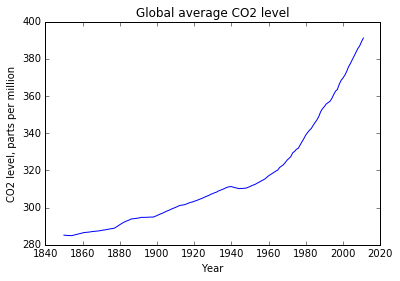

In [3]:
fig_gas, ax_gas = plt.subplots()
ax_gas.plot(gas_years, gas_vals)
ax_gas.set_xlabel('Year')
ax_gas.set_ylabel('CO2 level, parts per million')
ax_gas.set_title('Global average CO2 level')

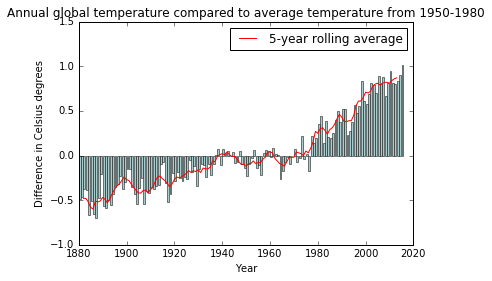

In [4]:
fig_temp, ax_temp = plt.subplots()
ax_temp.bar(temp_years, temp_annual_means, color='#aacccc', linewidth=0.5)
line_5yr_means = ax_temp.plot(temp_5yr_years, temp_5yr_means, color='red', 
                         linewidth=1, label='5-year rolling average')
ax_temp.set_ylabel('Difference in Celsius degrees')
ax_temp.set_xlabel('Year')
ax_temp.set_title("Annual global temperature compared to average temperature from 1950-1980")
ax_temp.legend(handles=line_5yr_means);

# Using matplotlib stylesheets to emulate ggplot2 look

[matplotlib: Customizing plots with style sheets](http://matplotlib.org/users/style_sheets.html)

As it turns out, matplotlib comes with a stylesheet named `'ggplot'`; how convenient!


We can use the "temporary styling" pattern so that the `"ggplot"` stylesheet doesn't globally change every other plot:


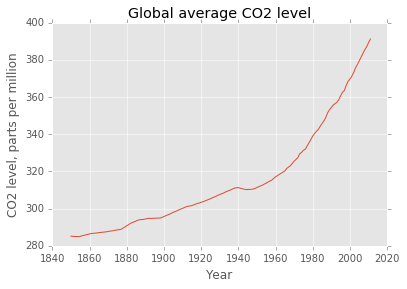

In [5]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.plot(gas_years, gas_vals)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')


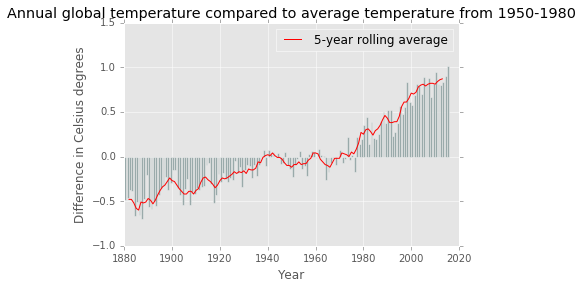

In [6]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.bar(temp_years, temp_annual_means, color='#99AAAA', linewidth=0.5)
    line_5yr_means = ax.plot(temp_5yr_years, temp_5yr_means, color='red', 
                             linewidth=1, label='5-year rolling average')
    ax.set_ylabel('Difference in Celsius degrees')
    ax.set_xlabel('Year')
    ax.set_title("Annual global temperature compared to average temperature from 1950-1980")

    ax.legend(handles=line_5yr_means);

# Creating ggplot2 look from scratch 

A quick runthrough of the matplotlib API for changing the characteristics of plots and axes. More elaboration TK.


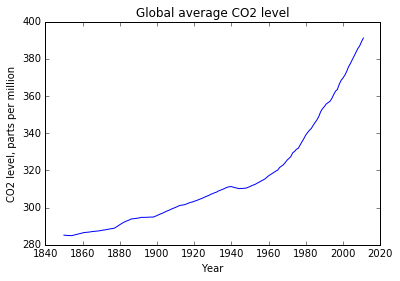

In [7]:
def make_gas_graph():
    fig, ax = plt.subplots()
    ax.plot(gas_years, gas_vals)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')
    return ax_gas


ax = make_gas_graph()
ax;

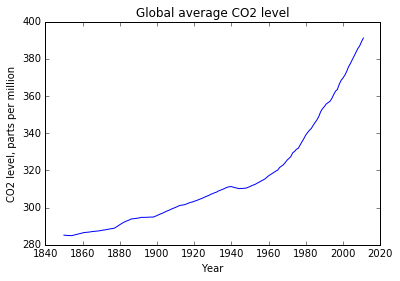

In [8]:
# Add background color
ax = make_gas_graph()
ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
ax.set_axis_bgcolor('#E6E6E6')


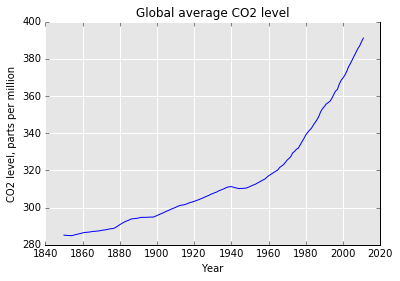

In [9]:
# Hide splines

def make_gas_graph():
    fig, ax = plt.subplots()
    
    ax.plot(gas_years, gas_vals, zorder=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')
    ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
    ax.set_axis_bgcolor('#E6E6E6')
    return ax


make_gas_graph();



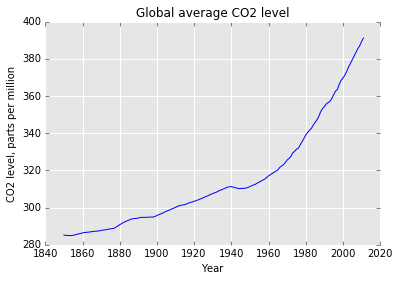

In [10]:


def make_gas_graph():
    fig, ax = plt.subplots()
    for s in ax.spines.values():
        s.set_visible(False)
    ax.plot(gas_years, gas_vals, zorder=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')
    ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
    ax.set_axis_bgcolor('#E6E6E6')
    return ax


make_gas_graph();



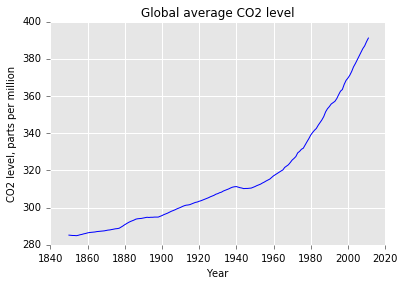

In [11]:
# remove the top/right axes ticks
ax = make_gas_graph()
ax.tick_params(top='off', right='off')
ax.tick_params(direction='out', pad=5)

In [12]:
def make_gas_graph():
    fig, ax = plt.subplots()
    for s in ax.spines.values():
        s.set_visible(False)    
    ax.plot(gas_years, gas_vals, zorder=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')
    ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
    ax.set_axis_bgcolor('#E6E6E6')
    ax.tick_params(top='off', right='off')
    ax.tick_params(direction='out', pad=5)
    
    return ax





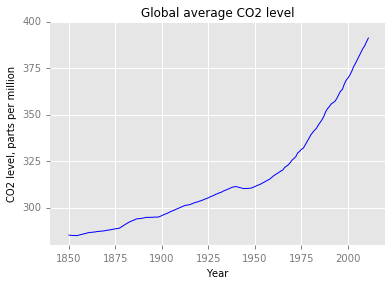

In [13]:
# Font styling and axis cleanup
import matplotlib.ticker as ticker

ax = make_gas_graph()
[t.set_color("#777777") for t in ax.get_xticklabels()]
[t.set_color("#777777") for t in ax.get_yticklabels()]
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))



In [14]:
# all together

def make_gas_graph():
    fig, ax = plt.subplots()
    for s in ax.spines.values():
        s.set_visible(False)    
    ax.plot(gas_years, gas_vals, zorder=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')
    ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
    ax.set_axis_bgcolor('#E6E6E6')
    ax.tick_params(top='off', right='off')
    ax.tick_params(direction='out', pad=5)
    [t.set_color("#777777") for t in ax.get_xticklabels()]
    [t.set_color("#777777") for t in ax.get_yticklabels()]
    ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
    
    return ax





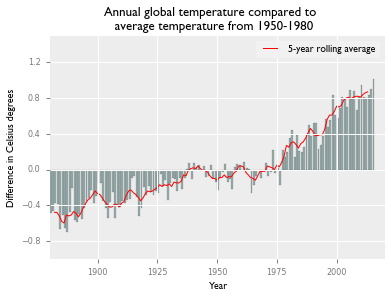

In [32]:
# Now for the temps
# TK explanation of fonts
# http://stackoverflow.com/questions/7726852/how-to-use-a-random-otf-or-ttf-font-in-matplotlib
import matplotlib.font_manager as fontmag
FONT = fontmag.FontProperties(fname='/Library/Fonts/GillSans.ttc')


CHART_FONT = {'fontname': 'Gill Sans'}
def make_temps_graph():
    fig, ax = plt.subplots()
    for s in ax.spines.values():
        s.set_visible(False)    

    ax.bar(temp_years, temp_annual_means, color='#99ACAC', linewidth=0.1)
    line_5yr_means = ax.plot(temp_5yr_years, temp_5yr_means, color='red', 
                             linewidth=1, label='5-year rolling average')
    ax.set_ylabel('Difference in Celsius degrees', fontproperties=FONT, size=11)
    ax.set_xlabel('Year', fontproperties=FONT, size=11)
    fig.suptitle("Annual global temperature compared to \n average temperature from 1950-1980", 
                 fontproperties=FONT, fontsize=13, y=1.00)
    lgnd = ax.legend(handles=line_5yr_means, prop=FONT);
    lgnd.get_frame().set_linewidth(0.0) 
    lgnd.get_frame().set_color("#F1F1F1")
        
    ax.grid(color="#FFFFFF", linewidth=1, linestyle='-', zorder=0)
    ax.set_axis_bgcolor('#EDEDED')
    ax.tick_params(top='off', right='off')
    ax.tick_params(direction='out', pad=5)
    for t in ax.get_xticklabels():
        t.set_color("#777777")
        t.set_fontsize(8)
    for t in ax.get_yticklabels():
        t.set_color("#777777")
        t.set_fontsize(8)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    
    return fig, ax

make_temps_graph();

Saving to disk can be done like this:

```py
from os import makedirs
from os.path import join
IMG_DIR = 'images'
makedirs(IMG_DIR, exist_ok=True)

imgname = join(IMG_DIR, 'ggplot-global-temp-level.png')
fig, ax = make_temps_graph()
fig.savefig(imgname, dpi=200)
```